# Proyecto Integrador - Machine Learning en Mercado Automotor

## Por Matias Pereyra - https://www.linkedin.com/in/matiaspereyra-bi/

---

### **Planteamiento de la problemática**
Hemos sido contratados en el equipo de ciencias de datos en una consultora de renombre. Nos han asignado a un proyecto de estudio de mercado de una importante automotriz china. Nuestro cliente desea ingresar a nuestro mercado de automóviles, por lo que nos han encomendado analizar las características de los vehículos presentes en el mercado actual. Dado que tienen en su catálogo una amplia colección de modelos de todo tipo, cuyo catálogo está estratificado en gamas según el gusto de cada región, desean saber qué características presentan los vehículos de gama alta y los de gama baja en nuestro mercado, para poder abarcar todo los públicos objetivos ajustándose a toda la demanda y, en base a estos datos, poder cotizar correctamente los vehículos que ofrecerá.
Para ello, nuestro departamento de datos ha recopilado precios y características de varios de los modelos de vehículos disponibles en nuestro mercado, junto con sus precios de venta al público.

Nuestro Data Lead nos ha recomendado que analicemos detalladamente los datos, los preprocesemos debidamente y que diseñemos dos modelos predictivos, uno para el precio y otro para distinguir vehículos de gama alta y de gama baja, utilizando la mediana de los precios como punto de corte. Desean obtener los archivos con las predicciones en formato de texto plano.

Además del análisis detallado de la exploración de los datos, estas son las dos predicciones posibles que les interesaría analizar:

1. Implementar un modelo de clasificación con aprendizaje supervisado que permita clasificar el precio de los vehículos en baratos y caros usando la mediana de los precios como punto de corte, utilizando los datos que se han puesto a su disposición.

2. Implementar un modelo de regresión con aprendizaje supervisado que permita predecir el precio final de los vehículos, utilizando los datos que se han puesto a su disposición.


---

### **Análisis exploratorio de datos**

Importamos las librerías necesarias para realizar nuestro análisis

In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
sns.set()

Importamos el dataset y visualizamos su información

In [9]:
#Importamos el dataset en la variable df y vemos su información
df = pd.read_csv('ML_cars.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [10]:
#Visualizamos primeras columnas
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
#Exploramos la forma del dataset
df.shape

(205, 26)

In [12]:
#Vemos los nombres de las columnas
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [13]:
#Revisamos valores faltantes
print(df.isna().sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


Contamos con un dataset de **205 registros** en **26 columnas** sin valores faltantes.

A continuación trataremos de identificar columnas irrelevantes para nuestro análisis a fines de reducir el tamaño del dataset

---

### **Transformación y Limpieza**

In [14]:
#Contamos valores de CarID y CarName
print(df.car_ID.unique())
print(df.CarName.unique())

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]
['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i'

**CarID** y **CarName** parecieran columnas de las que podemos prescindir, aunque **CarName** podría llegar a ser útil en algunos modelos la gran variedad de valores únicos harían nuestro modelo demasiado complejo.

In [15]:
#Eliminamos comlumnas car_ID y CarName
df.drop(['car_ID','CarName'] , axis = 1 , inplace = True)

Evaluaremos si la cantidad de puertas es relevante

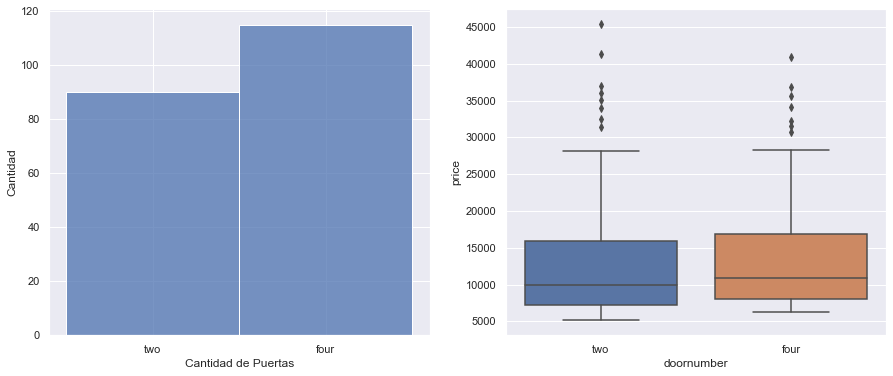

In [16]:
#Creamos un subplot para ver ambas visualizaciones
fig , ax = plt.subplots(1 , 2 ,figsize=(15,6))

#Creamos el histograma
ax[0].set_xlabel('Cantidad de Puertas')
ax[0].set_ylabel('Cantidad')
sns.histplot(df['doornumber'] ,ax=ax[0])


#Creamos el boxplot
ax[1].set_ylabel('Precio') 
sns.boxplot(y = df['price'],x = df['doornumber'], ax = ax[1]) 

plt.show()

Hacemos lo mismo con la ubicación del motor

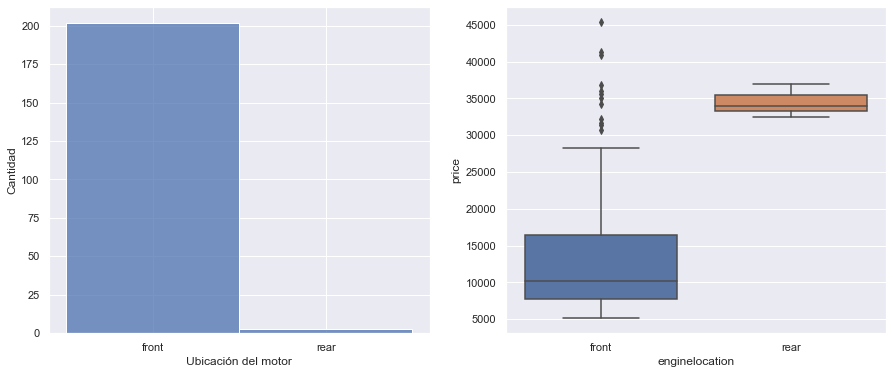

In [17]:
fig , ax = plt.subplots(1 , 2 ,figsize=(15,6))

ax[0].set_xlabel('Ubicación del motor')
ax[0].set_ylabel('Cantidad')
sns.histplot(df['enginelocation'] ,ax=ax[0])


ax[1].set_xlabel('Ubicación del motor')
ax[1].set_ylabel('Precio')
sns.boxplot(y = df['price'],x = df['enginelocation'], ax = ax[1])

plt.show()

Al evaluar la columna **cantidad de puertas**, notamos que tienen una distribución pareja en el dataset y no aportan diferencias a la hora de evaluar el precio. En cuanto a la **ubicación del motor**, pareciera se una variable que puede servir a la hora de predecir el precio pero los registros son muy desbalanceadas. Decidimos prescindir de ambas.

In [18]:
#Eliminamos ambas columnas
df.drop(['doornumber','enginelocation'] , axis = 1 , inplace = True)

Seguiremos evaluando los siguientes campos: **symboling**, **fueltype**, **aspiration**, **carbody**, **drivewheel**, **enginetype**, **cylindernumber** y **fuelsystem** con la misma metodología.

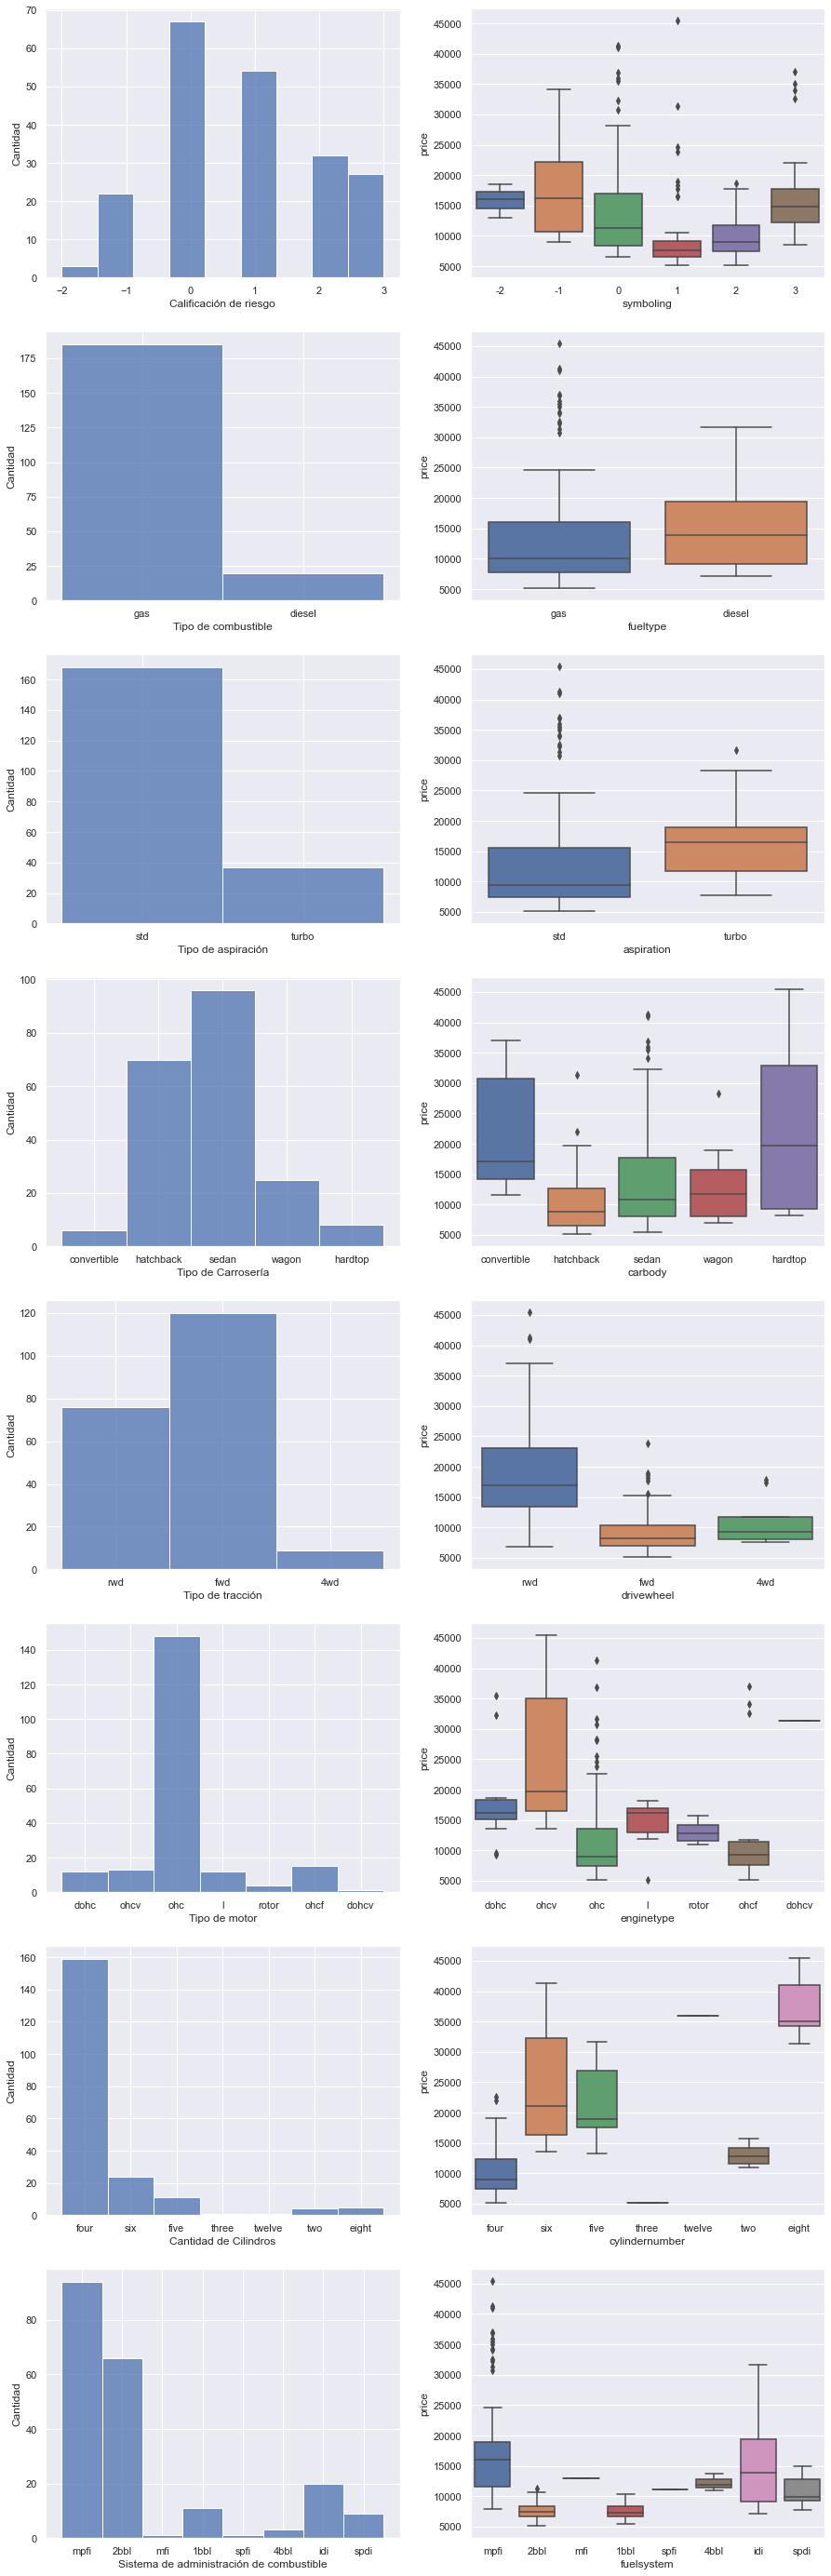

In [19]:
fig , ax = plt.subplots(8 , 2 ,figsize=(15,50))

ax[0,0].set_xlabel('Calificación de riesgo')
ax[0,0].set_ylabel('Cantidad')
sns.histplot(df['symboling'] ,ax=ax[0,0])


ax[0,1].set_xlabel('Ubicación del motor')
ax[0,1].set_ylabel('Precio')
sns.boxplot(y = df['price'],x = df['symboling'], ax = ax[0,1])

ax[1,0].set_xlabel('Tipo de combustible')
ax[1,0].set_ylabel('Cantidad')
sns.histplot(df['fueltype'] ,ax=ax[1,0])


ax[1,1].set_xlabel('Tipo de combustible')
ax[1,1].set_ylabel('Precio')
sns.boxplot(y = df['price'],x = df['fueltype'], ax = ax[1,1])

ax[2,0].set_xlabel('Tipo de aspiración')
ax[2,0].set_ylabel('Cantidad')
sns.histplot(df['aspiration'] ,ax=ax[2,0])


ax[2,1].set_xlabel('Tipo de aspiración')
ax[2,1].set_ylabel('Precio')
sns.boxplot(y = df['price'],x = df['aspiration'], ax = ax[2,1])

ax[3,0].set_xlabel('Tipo de Carrosería')
ax[3,0].set_ylabel('Cantidad')
sns.histplot(df['carbody'] ,ax=ax[3,0])


ax[3,1].set_xlabel('Tipo de Carrosería')
ax[3,1].set_ylabel('Precio')
sns.boxplot(y = df['price'],x = df['carbody'], ax = ax[3,1])

ax[4,0].set_xlabel('Tipo de tracción')
ax[4,0].set_ylabel('Cantidad')
sns.histplot(df['drivewheel'] ,ax=ax[4,0])


ax[4,1].set_xlabel('Tipo de tracción')
ax[4,1].set_ylabel('Precio')
sns.boxplot(y = df['price'],x = df['drivewheel'], ax = ax[4,1])

ax[5,0].set_xlabel('Tipo de motor')
ax[5,0].set_ylabel('Cantidad')
sns.histplot(df['enginetype'] ,ax=ax[5,0])


ax[5,1].set_xlabel('Tipo de motor')
ax[5,1].set_ylabel('Precio')
sns.boxplot(y = df['price'],x = df['enginetype'], ax = ax[5,1])

ax[6,0].set_xlabel('Cantidad de Cilindros')
ax[6,0].set_ylabel('Cantidad')
sns.histplot(df['cylindernumber'] ,ax=ax[6,0])


ax[6,1].set_xlabel('Cantidad de Cilindros')
ax[6,1].set_ylabel('Precio')
sns.boxplot(y = df['price'],x = df['cylindernumber'], ax = ax[6,1])

ax[7,0].set_xlabel('Sistema de administración de combustible')
ax[7,0].set_ylabel('Cantidad')
sns.histplot(df['fuelsystem'] ,ax=ax[7,0])


ax[7,1].set_xlabel('Sistema de administración de combustible')
ax[7,1].set_ylabel('Precio')
sns.boxplot(y = df['price'],x = df['fuelsystem'], ax = ax[7,1])

plt.show()

Concluimos al analizas los anteriores campos que: 
- En cuanto a la **calificación de riesgo**, no encontramos una relación con el **precio**. 
- Al evaluar por **tipo de combustible** vemos que los vehículos que funcionan con **Diesel** son ligeramente más **caros** que los vehículos a Nafta. 
- De la misma forma vemos con respecto a la **aspiración** que los vehículos **turbo** tienden a ser más **caros** que los estandar. 
- En cuanto a la **carrocería** notamos un mayor precio en **convertible**s y **hardtop**.
- Con respecto a la **tracció**n notamos que la **RWD** tiene un precio más alto.
- Por último notamos que en las categorías **Tipo de motor**, **Cantidad de Cilindros** y **Sistema de administración de combustible** hay varias categorías, con una distribución muy dispar que quizás haga demasiado complejo nuestro modelo.

Esto nos lleva a presindir de los siguientes campos:

In [20]:
#Eliminamos los siguientes campos
df.drop(['symboling','enginetype','cylindernumber','fuelsystem' ] , axis = 1 , inplace = True)
df.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,convertible,rwd,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,convertible,rwd,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,hatchback,rwd,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,sedan,fwd,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,sedan,4wd,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


Ahora exploraremos la distribución de nuestra variable objetivo precio (price).

In [21]:
df.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

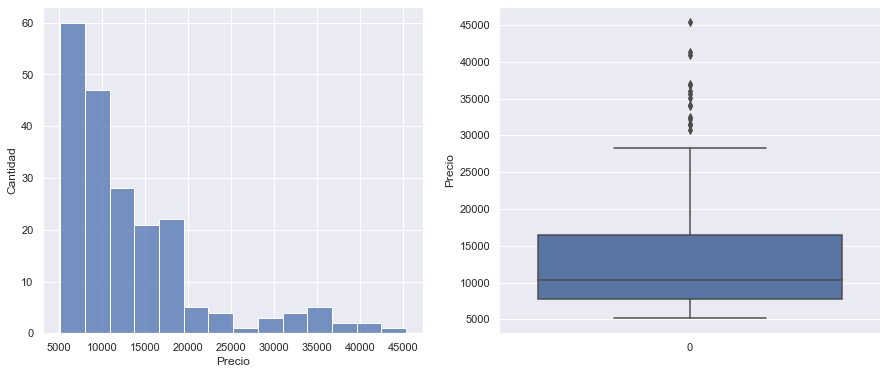

In [22]:
fig , ax = plt.subplots(1 , 2 ,figsize=(15,6))

ax[0].set_xlabel('Precio')
ax[0].set_ylabel('Cantidad')
sns.histplot(df['price'] ,ax=ax[0])



ax[1].set_ylabel('Precio')
sns.boxplot(df['price'],ax = ax[1])

plt.show()

Al evalaluar la distribución de nuestra variable objetivo, podemos concluir que hay varios valores anómalos ya que nuestro valor máximo es de **45400** mientras que el **75%** porciento de nuestros registros están por debajo de **16503**. Sin embargo entendemos que los valores anómalos seguramente coincidan con valuaciones de modelos con altas prestaciones. Por lo que decidimos **mantenerlos** para no alterar la muestra.

Exploremos las correlaciones de las variables numéricas con el precio

In [23]:
df.corr()['price']

wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

Encontramos que las correlaciones más cercanas son el **tamaño del motor (enginesize)**, el **peso del vehículo (curbweight)**, los **caballos de fuerza (horsepower)**, el **ancho del vehículo (carwidth)**, el **largo (carlength**) y el **consumo en ciudad y autopista (citympg y highwaympg)**.

Graficamos esas correlaciones para observarlas

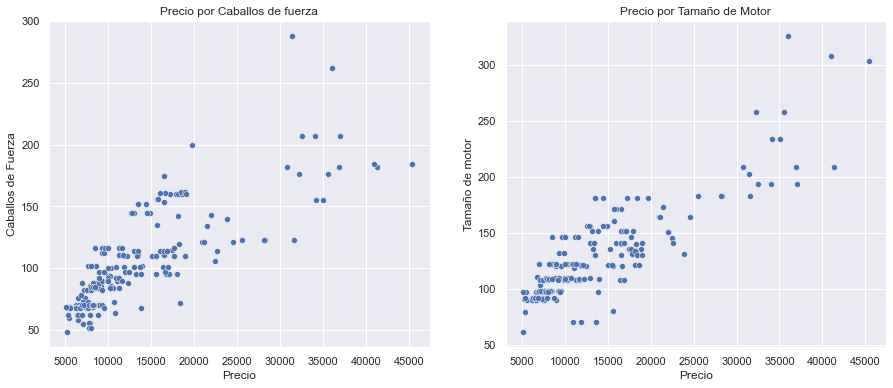

In [24]:
fig , ax = plt.subplots(1 , 2 ,figsize=(15,6))

ax[0].set_title('Precio por Caballos de fuerza')
ax[0].set_xlabel('Precio')
ax[0].set_ylabel('Caballos de Fuerza')
sns.scatterplot(data =df ,y = 'horsepower' , x = 'price',ax=ax[0])

ax[1].set_title('Precio por Tamaño de Motor')
ax[1].set_xlabel('Precio')
ax[1].set_ylabel('Tamaño de motor')
sns.scatterplot(data =df ,y = 'enginesize' , x = 'price',ax=ax[1])



plt.show()


Podemos observar la correlación entre estas dos variables y el precio. Con esto se infiere que a **mayor potencia, mayor el precio** del vehículo.

Ahora vamos a graficar las variables relacionadas con las dimensiones del auto.

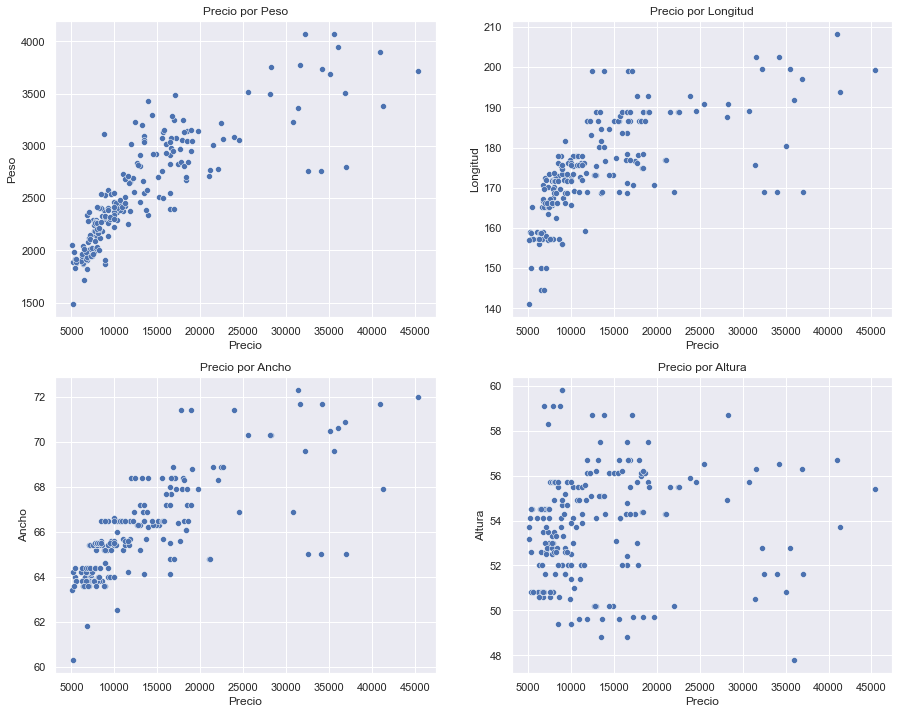

In [25]:
fig , ax = plt.subplots(2 , 2 ,figsize=(15,12))

ax[0,0].set_title('Precio por Peso')
ax[0,0].set_xlabel('Precio')
ax[0,0].set_ylabel('Peso')
sns.scatterplot(data =df ,y = 'curbweight' , x = 'price',ax=ax[0,0])

ax[0,1].set_title('Precio por Longitud')
ax[0,1].set_xlabel('Precio')
ax[0,1].set_ylabel('Longitud')
sns.scatterplot(data =df ,y = 'carlength' , x = 'price',ax=ax[0,1])

ax[1,0].set_title('Precio por Ancho')
ax[1,0].set_xlabel('Precio')
ax[1,0].set_ylabel('Ancho')
sns.scatterplot(data =df ,y = 'carwidth' , x = 'price',ax=ax[1,0])

ax[1,1].set_title('Precio por Altura')
ax[1,1].set_xlabel('Precio')
ax[1,1].set_ylabel('Altura')
sns.scatterplot(data =df ,y = 'carheight' , x = 'price',ax=ax[1,1])



plt.show()

Podemos corroborar que hay cierta correlación positiva entre el **ancho, largo y peso** del auto con su **precio**. No existe esa misma correlación con la Altura.

Por último vamos a visualizar la correlación entre el consumo con el precio

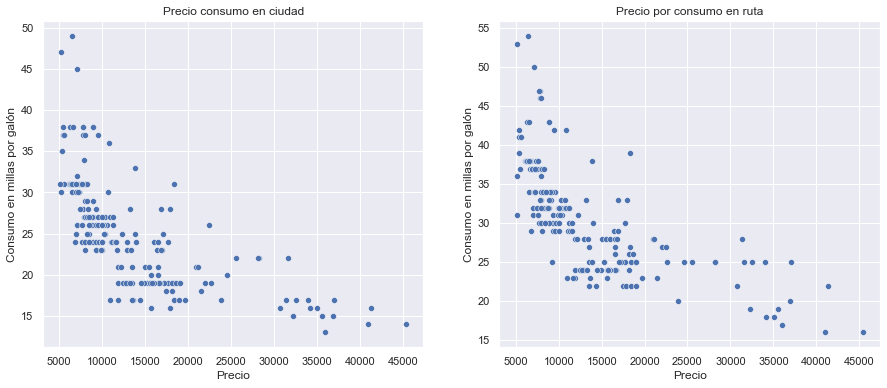

In [26]:
fig , ax = plt.subplots(1 , 2 ,figsize=(15,6))

ax[0].set_title('Precio consumo en ciudad')
ax[0].set_xlabel('Precio')
ax[0].set_ylabel('Consumo en millas por galón')
sns.scatterplot(data =df ,y = 'citympg' , x = 'price',ax=ax[0])

ax[1].set_title('Precio por consumo en ruta')
ax[1].set_xlabel('Precio')
ax[1].set_ylabel('Consumo en millas por galón')
sns.scatterplot(data =df ,y = 'highwaympg' , x = 'price',ax=ax[1])



plt.show()

Observamos una correlación negativa entre estas variables. Esto se explica que cuanto más **eficiente es el vehículo en consumo, mas caro es**.

Procederemos a eliminar las variables numéricas con muy poca correlación antes de seguir con el análisis exploratorio de nuestras variables categóricas.

In [27]:
df.drop(['carheight','boreratio','stroke','compressionratio','peakrpm'] , axis = 1 , inplace = True)

Para continuar vamos a evaluar la relación entre las variables y nuestra variable a predecir, si el vehículo es "Barato" o "Caro" guiandonos por la mediana.
Para esto vamos a empezar eliminando los outliers basandonos en el rango intercuartílico, creando una nueva columna y por último usando esta columna en un pairplot para visualizarlas.

In [29]:
#Declaramos los bins (Minimo, mediana y máximo) y elegimos las etiquetas (0 para los baratos, 1 para los caros)
bins = (0, 10295, 45400)
labels = [0,1]

In [30]:
#Creamos el campo categoría
categoria = pd.cut(df.price, bins , labels = labels)

In [31]:
#Agrgamos a nuestro dataset el campo categoría
df['Categoria'] = categoria
df.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg,price,Categoria
0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,130,111,21,27,13495.0,1
1,gas,std,convertible,rwd,88.6,168.8,64.1,2548,130,111,21,27,16500.0,1
2,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,152,154,19,26,16500.0,1
3,gas,std,sedan,fwd,99.8,176.6,66.2,2337,109,102,24,30,13950.0,1
4,gas,std,sedan,4wd,99.4,176.6,66.4,2824,136,115,18,22,17450.0,1


Ya con nuestra categoría definida, vamos a crear un Pairplot para evaluar nuestas variables categóricas

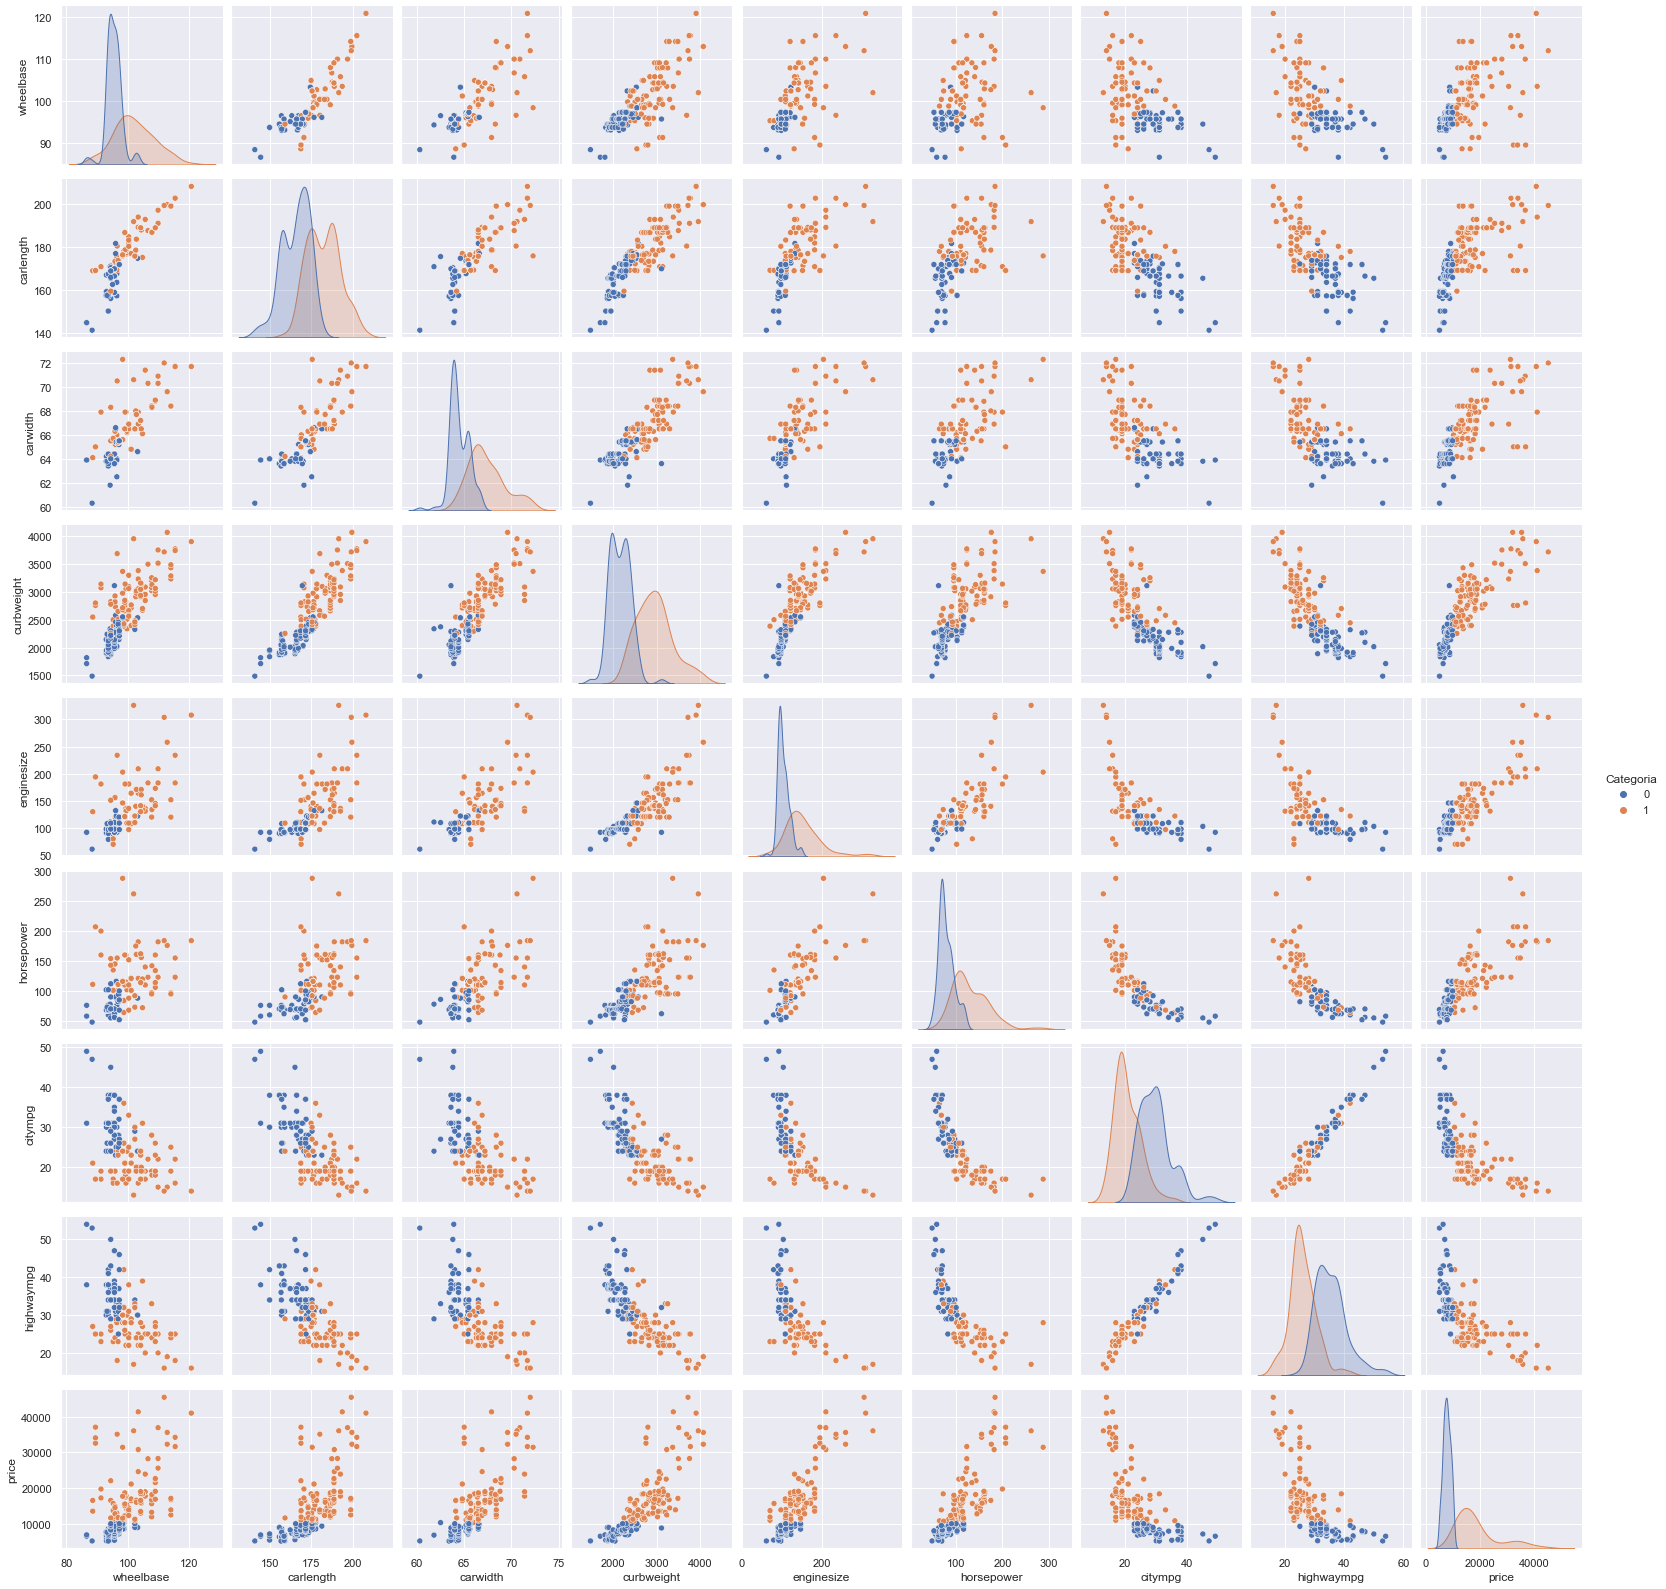

In [32]:
sns.pairplot(df, hue = 'Categoria')

Al observar nuestro pairplot notamos que todas nuestras categorías nos ayudan a separar por precio, aunque podemos detacar algunas como **enginesize**, **horsepower** y **curbweight**

---

## Modelo de Clasificación

In [33]:
#Creamos nuestro objeto scaler para reescalar nuestras variables numericas
scaler = MinMaxScaler()
#Creamos nuestro objeto le para codificar nuestras variables categóricas
le = preprocessing.LabelEncoder()
#Creamos listas con nuestras variables numéricas y categóricas para simplificar las transformaciones
numericas = ['wheelbase','carlength','carwidth','curbweight','enginesize','horsepower','citympg','highwaympg','price']
categoricas = ['fueltype','aspiration','carbody','drivewheel']

In [34]:
#Copiamos el dataset para no alterar el original en caso de que lo necesitemos más adelante
df_cl = df.copy()

#Reescalamos nuestras variables numéricas
df_cl[numericas] = scaler.fit_transform(df_cl[numericas])

#Mediante un ciclo for codificamos todas nuestras variables categóricas
for n in categoricas:
    df_cl[n] = le.fit_transform(df_cl[n])

#Visualizamos el resultado    
df_cl.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginesize,horsepower,citympg,highwaympg,price,Categoria
0,1,0,0,2,0.058309,0.413433,0.316667,0.411171,0.260377,0.262500,0.222222,0.289474,0.207959,1
1,1,0,0,2,0.058309,0.413433,0.316667,0.411171,0.260377,0.262500,0.222222,0.289474,0.282558,1
2,1,0,2,2,0.230321,0.449254,0.433333,0.517843,0.343396,0.441667,0.166667,0.263158,0.282558,1
3,1,0,3,1,0.384840,0.529851,0.491667,0.329325,0.181132,0.225000,0.305556,0.368421,0.219254,1
4,1,0,3,0,0.373178,0.529851,0.508333,0.518231,0.283019,0.279167,0.138889,0.157895,0.306142,1


In [36]:
#Definimos las variables X e y para nuestro modelo de clasificación.
#Y es nuestra variable objetivo ('Categoria') y X es todo nuestro dataset excepto Categoria (Variable de salida) y price ya que están altamente relacionadas
y = df_cl['Categoria']
X = df_cl.drop(['Categoria','price'], axis=1)

In [37]:
# Creamos un objeto arbol asignandole una profundidas de 3
tree = DecisionTreeClassifier(max_depth = 2)

In [38]:
#Separamos nuestros datos en el conjunto de entrenamiento y conjunto de validación

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [40]:
#Entrenamos nuestro arbol de decisión
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [41]:
# Predecimos sobre nuestro set de entrenamieto
y_train_pred = tree.predict(X_train)

# Predecimos sobre nuestro set de test
y_test_pred = tree.predict(X_test)

# Comaparamos con las etiquetas reales
print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 0.9562043795620438
Accuracy sobre conjunto de Test: 0.8823529411764706


Intentaremos encontrar el valor de profundidad que mejor se adapte a nuestros datos

In [42]:
# Definimos las listas vacias para los valores de accuracy deseados
lista_accuracy_train = []
lista_accuracy_test = []

# Definimos la lista de valores de d que vamos a explorar
deep = [1,2,3,4,5,6,7,8,9,10]

# Generamos en loop sobre los distintos valores de deep 
for d in deep:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    tree = DecisionTreeClassifier(max_depth = d)
    
    # Entrenar el modelo
    tree.fit(X_train, y_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = tree.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = tree.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # Agregar la información a las listas
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

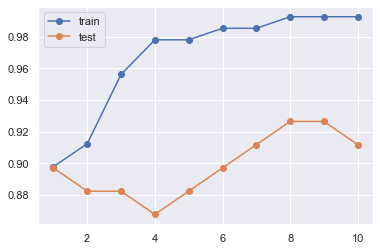

In [43]:
#Ploteamos la acuracy de cada ciclo junto con su deep para comparar el modelo de entrenamiento junto con su test

plt.plot(deep,lista_accuracy_train,'o-',label='train' )
plt.plot(deep,lista_accuracy_test,'o-',label='test')
plt.legend()

Intentaremos repetir el modelo reduciendo campos que estén relacionados a fines de simplificar el modelo

In [116]:
y = df_cl['Categoria']
X = df_cl.drop(['Categoria','price','drivewheel','carbody','wheelbase','highwaympg','fueltype','horsepower'], axis=1)

In [117]:
#Visualizamos las columnas para evaluar cuales utilizar
df_cl.columns

Index(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase',
       'carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower',
       'citympg', 'highwaympg', 'price', 'Categoria'],
      dtype='object')

In [123]:
tree = DecisionTreeClassifier(max_depth = 5)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [125]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [126]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 0.9854014598540146
Accuracy sobre conjunto de Test: 0.9264705882352942


In [127]:
lista_accuracy_train = []
lista_accuracy_test = []

deep = [1,2,3,4,5,6,7,8,9,10]

for d in deep:
    
    tree = DecisionTreeClassifier(max_depth = d)
    
    tree.fit(X_train, y_train)
    
    y_train_pred = tree.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    y_test_pred = tree.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    lista_accuracy_train.append(train_acc)
    lista_accuracy_test.append(test_acc)

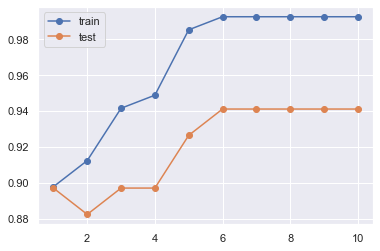

In [128]:
plt.plot(deep,lista_accuracy_train,'o-',label='train' )
plt.plot(deep,lista_accuracy_test,'o-',label='test')
plt.legend()

Finalizamos la investigación con un modelo con una accuracy del 92.6%, bastante aceptable aunque debemos seguir haciendo pruebas con distintos campos para optimizarlo.

---

## Modelo de Clasificación

In [130]:
#Buscamos las variables con mayor correlación con el precio
df_cl.corr()['price']

fueltype     -0.105679
aspiration    0.177926
carbody      -0.083976
drivewheel    0.577992
wheelbase     0.577816
carlength     0.682920
carwidth      0.759325
curbweight    0.835305
enginesize    0.874145
horsepower    0.808139
citympg      -0.685751
highwaympg   -0.697599
price         1.000000
Name: price, dtype: float64

In [131]:
#Definimos X e y, y va a representar el precio y X las 6 variables con mayor correlación
y = df_cl['price']
X = df_cl[['curbweight','enginesize','highwaympg','carwidth','horsepower','citympg']]

In [132]:
#Separamos nuestros datos en el conjunto de entrenamiento y conjunto de validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [133]:
#Creamos nuestra variable lr que es nuestro objeto LinearRegression
lr = LinearRegression(fit_intercept = True)
#Entrenamos nuestro modelo
lr.fit(X_train, y_train)

LinearRegression()

In [134]:
print(lr.coef_)
print(lr.intercept_)
print(lr.rank_)

[ 0.05538713  0.5147851  -0.14117356  0.2510373   0.28480137  0.06040328]
-0.09996345773481999
6


In [137]:
#Guardamos nuestras predicciones en las variables de salida y evaluamos el Mean Squared Error
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
print('Error en datos de train:', mean_squared_error(y_train, y_train_pred))
print('Error en datos de test:', mean_squared_error(y_test, y_test_pred))

Error en datos de train: 0.00604647149331748
Error en datos de test: 0.009684399973233001


El error de nuestra predicción es muy pequeño así que concluimos con la investigación.